# Toyota_used_car_ML
### Basic of Machine Learning, Supervised Learning: Linear Regression and Regression accuracy metrics

Md Asifuzzaman
<br>BSc in Statistics, Dhaka College affiliated to the University of Dhaka
<br>The objective of this project is to perform the Linear Regression and Predict the target variable, 'Price', from the test set and Compare the performance of the model. 
<br>The dataset is collected from __Kaggle__.

__Objective__ 
1. Perform ML using Scikitlearn 
2. Model Performance Evaluation through visualization using matplotlib and seaborn
3. Dealing with categorical variables through One-Hot Encoding and Label Encoding 
4. Split the original dataset into the train set and the test set.
5. Show the coefficients of linear regression model for each feature and the y-intercept value of linear regression model. 
6. Find the following Regression accuracy metrics from the actual target variable and the predicted target variable.
   1. Mean Absolute Error (MAE)
   2. Mean Absolute Percentage Error (MAPE)
   3. Mean Squared Error (MSE)
   4. Root Mean Squared Error (RMSE)
   5. R-squared or coefficient of determination 
  

__References__
<br>Dataset Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw


### Import Libraries

In [1]:
# required libraries for data analysis
import pandas as pd
import numpy as np

# required libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# required libraries to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context("talk")

## Dataset information
The data set contains information of price, transmission, mileage, fuel type, year, model, miles per gallon (mpg), and engineSize.
#### Target Variable:
__price:__ Selling price of the cars
#### Features:
1. __model:__ list of the Ford cars
2. __year:__ when the car was made
3. __transmission:__ transmission adapts the output of the internal combustion engine to the drive wheels
4. __mileage:__ the mileage of a vehicle is the number of miles that it can travel using one gallon or litre of fuel
5. __fuelType:__ different fuels a vehicle may use 
6. __mpg:__ miles per gallon the vehicle can travel
7. __engineSize:__ engine size is the volume of fuel and air that can be pushed through a car's cylinders
    

### Loading the dataset

In [2]:
# import the data
# read a csv file as pandas DataFrame
df = pd.read_csv("toyota.csv")

# check the first 5 rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Dealing with Categorical Variables

In [3]:
print(df['transmission'].unique())
print(len(df['transmission'].unique()))
display(df['transmission'].value_counts())

['Manual' 'Automatic' 'Semi-Auto' 'Other']
4


Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [4]:
print(df['fuelType'].unique())
print(len(df['fuelType'].unique()))
display(df['fuelType'].value_counts())

['Petrol' 'Other' 'Hybrid' 'Diesel']
4


Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

#### Findings
- The number of categorial feature is 4.
- The categorical feature isn't ordinal. 

### One-Hot Encoding 
One-hot encoding is applied in the 'transmission' & 'fuelType' features. Because the features aren't ordinal and the number of categorical feature is less as it's shown above.  

In [5]:
df_transmission = pd.get_dummies(df[['transmission']])
display(df_transmission.head())

,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [6]:
df_fuelType = pd.get_dummies(df[['fuelType']])
display(df_fuelType.head())

,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [7]:
print(df['model'].unique())
print(len(df['model'].unique()))
display(df['model'].value_counts())

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
18


 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

#### Findings
- The number of categorial feature is 18

### Label Encoding
Label Encoding is applied in the 'model' feature. Because the number of categorical feature is quite large as it's shown above.

In [8]:
LE = LabelEncoder()

df['model'] = LE.fit_transform(df['model'])

display(df.sample(5))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1413,17,2017,13995,Automatic,16508,Hybrid,0,78.0,1.5
6119,11,2019,22490,Automatic,1995,Hybrid,135,61.4,1.8
909,17,2016,8698,Automatic,39513,Petrol,30,55.0,1.3
1847,17,2017,9995,Manual,7714,Petrol,30,58.0,1.3
4073,2,2019,9995,Semi-Auto,3356,Petrol,150,55.4,1.0


Dataset after dealing with categorial variable

In [9]:
df = pd.get_dummies(df, drop_first=True)
display(df.sample(5))

,model,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
3806,2,2017,8795,14485,145,68.9,1.0,1,0,0,0,0,1
4905,2,2017,8100,14006,0,68.9,1.0,1,0,0,0,0,1
1098,17,2018,10998,15123,145,56.5,1.5,1,0,0,0,0,1
2762,17,2014,10490,34528,0,80.7,1.5,0,0,0,1,0,0
2697,17,2017,9695,16331,30,55.0,1.3,1,0,0,0,0,1


### Separating the features and target variable

In [10]:
target = ['price']

X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(6738, 12) (6738, 1)


### Create train and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5390, 12) (1348, 12) (5390, 1) (1348, 1)


### Training with Linear Regression

In [12]:
model = LinearRegression()
model = model.fit(X_train, y_train)

### Linear Regression Coefficients and intercept

In [13]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
6,transmission_Manual,-1701.750184
0,model,-105.945448
4,mpg,-9.463778
3,tax,-0.287422
2,mileage,-0.067638
11,fuelType_Petrol,493.396968
7,transmission_Other,774.622071
1,year,860.819200
9,fuelType_Hybrid,1095.196019
8,transmission_Semi-Auto,1214.990745


#### Findings
The following feature variables are positive. So if the feature variables increase, the target variable 'Price' also increases
- fuelType_Petrol	
- transmission_Other	
- year	
- fuelType_Hybrid	
- transmission_Semi-Auto	
- fuelType_Other	
- engineSize

The following feature variables are negative. So if the feature variables increase, the target variable 'Price' decreases.
- transmission_Manual	
- model	
- mpg	
- tax	
- mileage

In [14]:
model.intercept_

array([-1735592.24514569])

### Prediction

In [15]:
y_pred = model.predict(X_test)

### Prediction Error

In [16]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2019.874199007349
mean squared error =  8380315.018003346
root mean squared error =  2894.8773752964644
coefficient of determination =  0.8030768335817255


### Comparison between the actual and predicted target variable through visualization

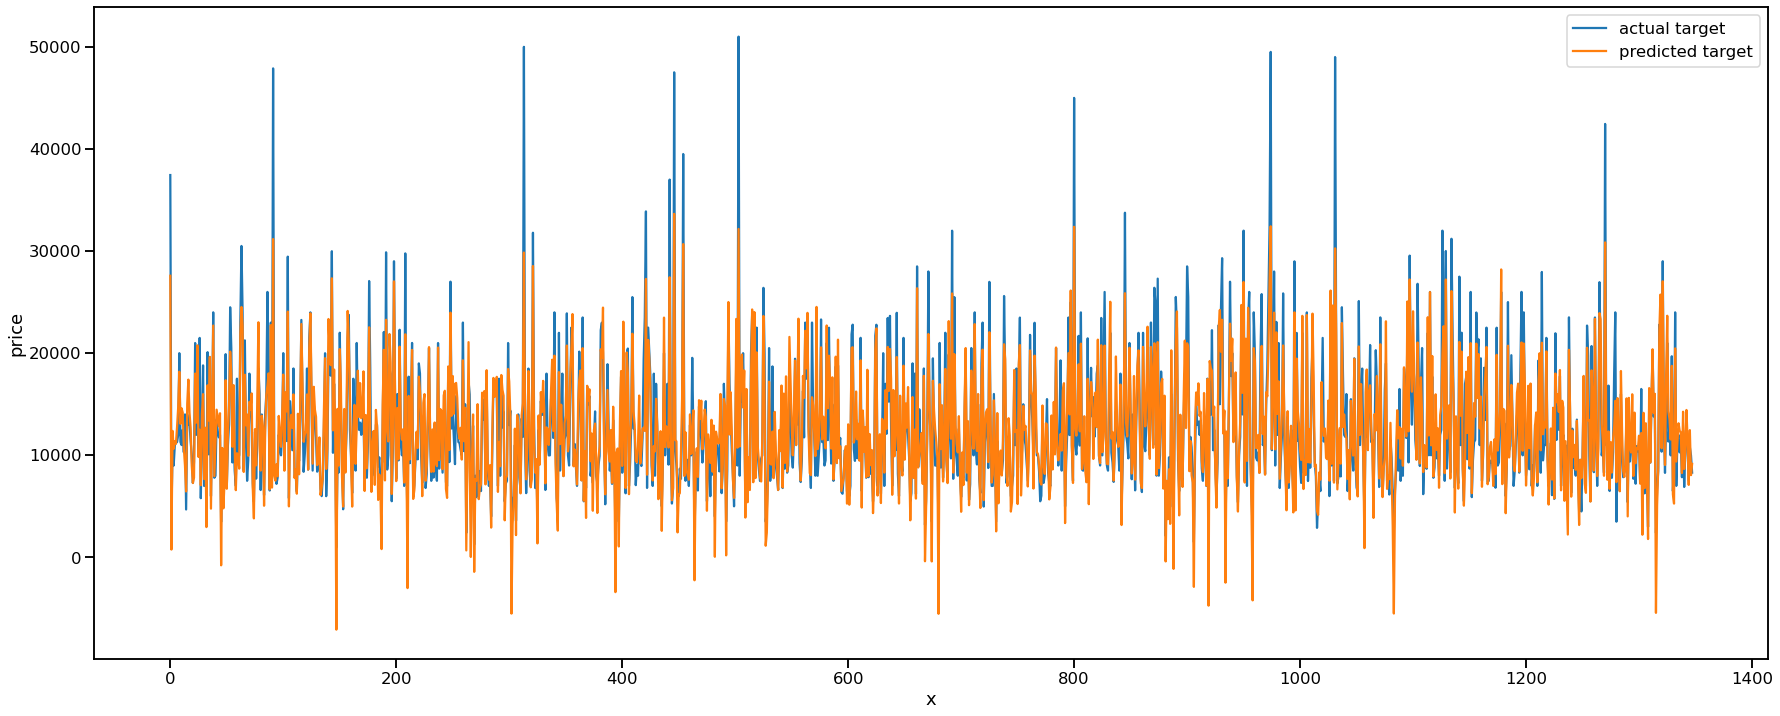

In [17]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

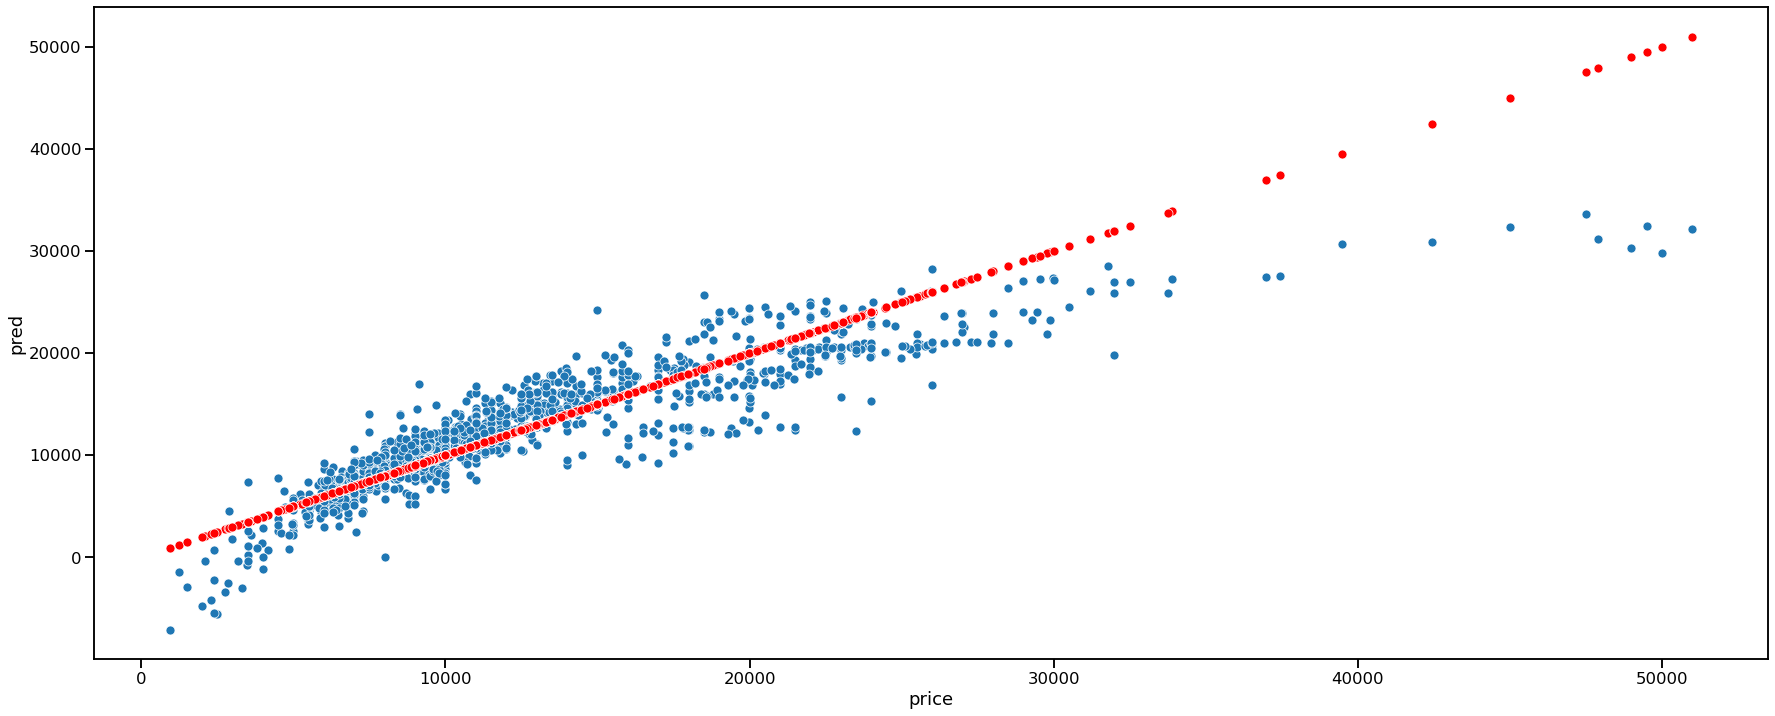

In [18]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()